## Import necessary libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Load data from CSV file

In [34]:
data = pd.read_csv(r"C:\Users\Vijay\Downloads\amazon.csv", encoding = "latin1", parse_dates = ['date'])
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## Replace the months into english words using replace function

In [36]:
def new_month(data, old, new):
    data['month'] = data['month'].replace(old, new)

new_month(data, 
          ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
           'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
          ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December'])

## Print 1st five rows

In [38]:
data.head()  

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


## Print last five rows

In [40]:
data.tail()  

,year,state,month,number,date
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01
6453,2016,Tocantins,December,119.0,2016-01-01


## Print data types of each column

In [42]:
data.dtypes  

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

## Shape of dataset (number of rows and columns)

In [44]:
print(data.shape)

print("the number of rows ",data.shape[0])
print("the number of columns ",data.shape[1])

(6454, 5)
the number of rows  6454
the number of columns  5


## Get the information about dataset

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## Check for duplicate valus

In [48]:
duplicate = data.duplicated().any()
duplicate  # True - there are duplicate values
           # False - there are no duplicate values

True

## Drop duplicates

In [50]:
data = data.drop_duplicates()

In [51]:
print(data.shape)

print("\nthe number of rows after dropping duplicates ",data.shape[0])
print("the number of columns after dropping duplicates ",data.shape[1],"\n")

print("number of duplicate values deleted ",6454-6422)

(6422, 5)

the number of rows after dropping duplicates  6422
the number of columns after dropping duplicates  5 

number of duplicate values deleted  32


## Check for null values

In [53]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

## Print the overall statistics of numerical columns

In [55]:
data.describe()  

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


## If we want the 99th quartile of specific column

In [57]:
data['number'].quantile(0.99)  

900.79

## If we want the 99th quartile of all numeric columns

In [59]:
data.select_dtypes(include='number').quantile(0.99)  

year      2017.00
number     900.79
Name: 0.99, dtype: float64

## Print the statistics of all the columns

In [61]:
data.describe(include="all")  

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,August,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


## In which month max forest fire are reported

In [63]:
month_forestfire = data.groupby('month')['number'].sum().reset_index()
month_forestfire

,month,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,November,85508.054


<Axes: xlabel='month', ylabel='number'>

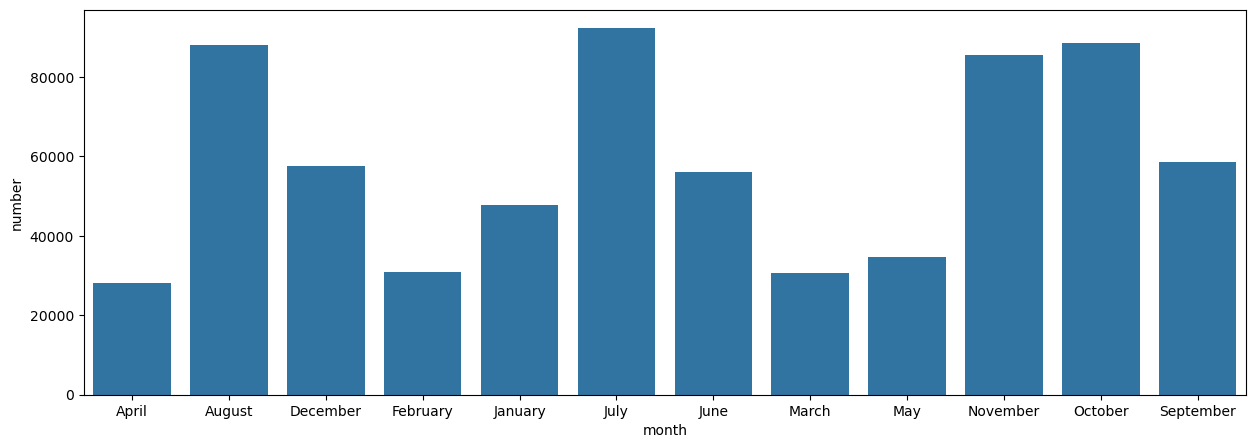

In [64]:
plt.figure(figsize = [15,5])
sns.barplot(x = 'month', y = 'number', data = month_forestfire)

                                    we can see that in "JULY" maximum number of forest fires are reported

## In which year maximum number of forest fire are reported

In [67]:
year_forestfire = data.groupby('year')['number'].sum().reset_index()
year_forestfire

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

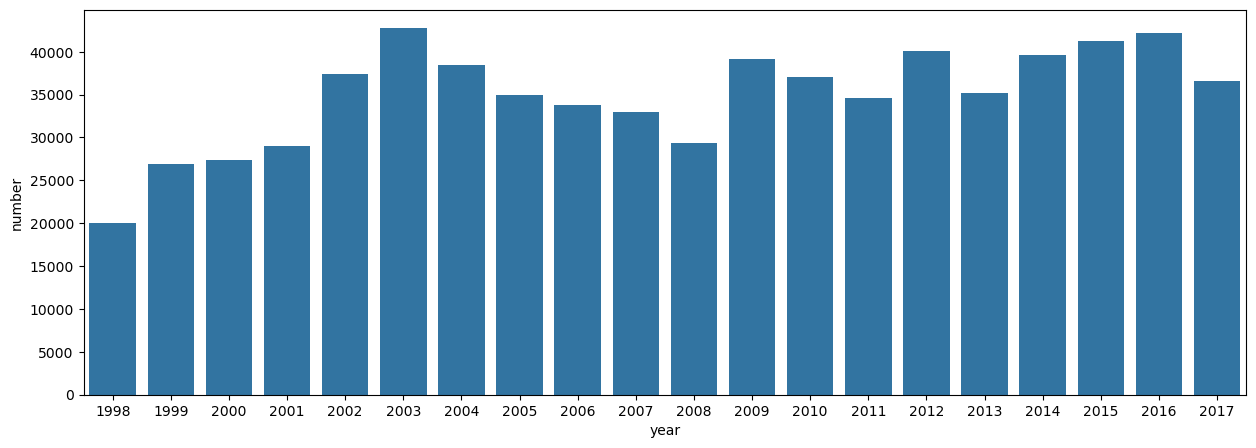

In [68]:
plt.figure(figsize = [15,5])
sns.barplot(x = 'year', y = 'number', data = year_forestfire)

                                    we can see that in "2003" maximum number of forest fires are reported

## In which state max forest fire reported

In [71]:
state_forestfire = data.groupby('state')['number'].sum().reset_index()
state_forestfire

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<Axes: xlabel='number', ylabel='state'>

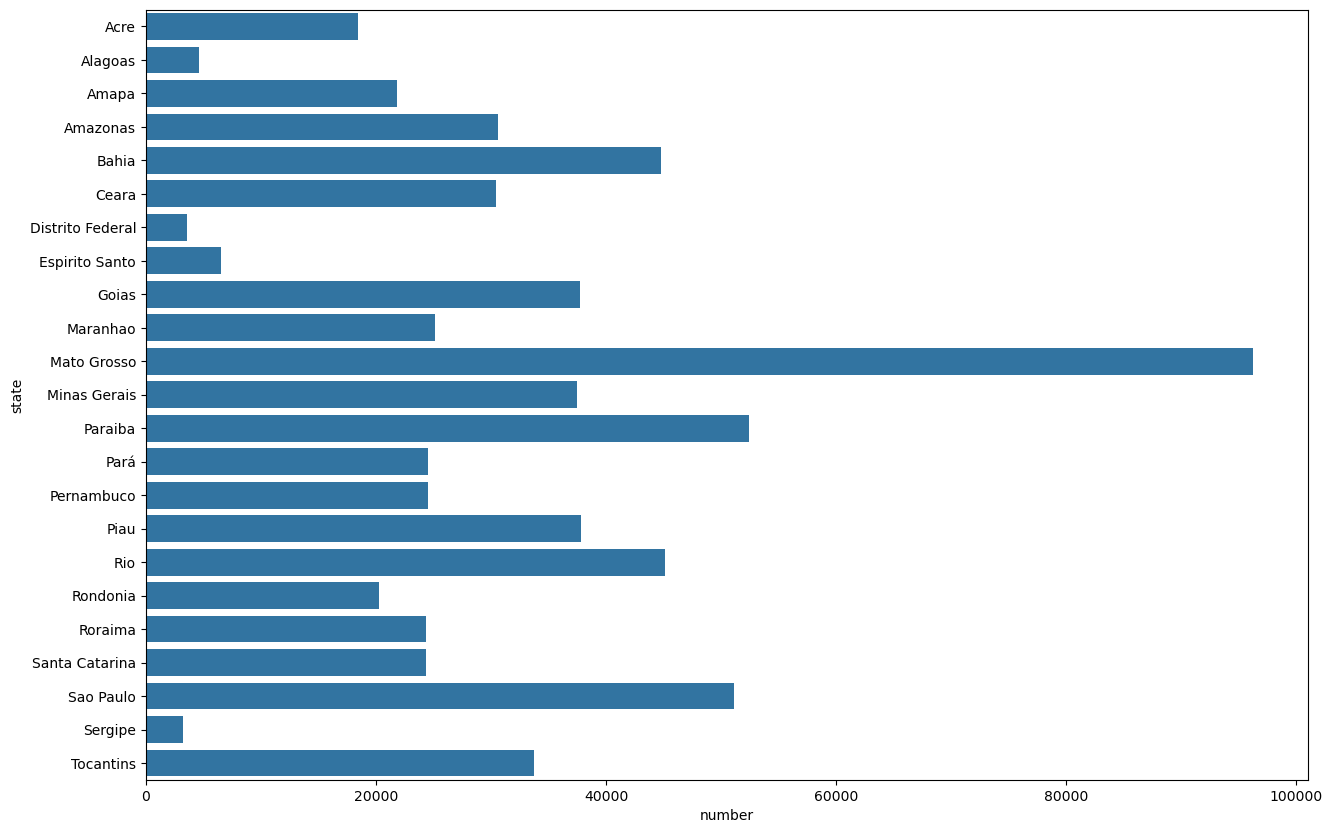

In [72]:
plt.figure(figsize = [15,10])
sns.barplot(y = 'state', x = 'number', data = state_forestfire)

                                    we can see that in "MATO GROSSO" maximum number of forest fires are reported

## Total number of forest fires reported in Amazonas

In [75]:
amazona_report = data[data['state'] == 'Amazonas']['number'].sum()
amazona_report

30650.129

In [76]:
print("The total number of forest fire reported in amazona are ",amazona_report)

The total number of forest fire reported in amazona are  30650.129


## Forest fires reported in Amazona (year wise)

In [78]:
amazonas_year = data[data['state'] == 'Amazonas'].groupby('year')['number'].sum().reset_index()
amazonas_year

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

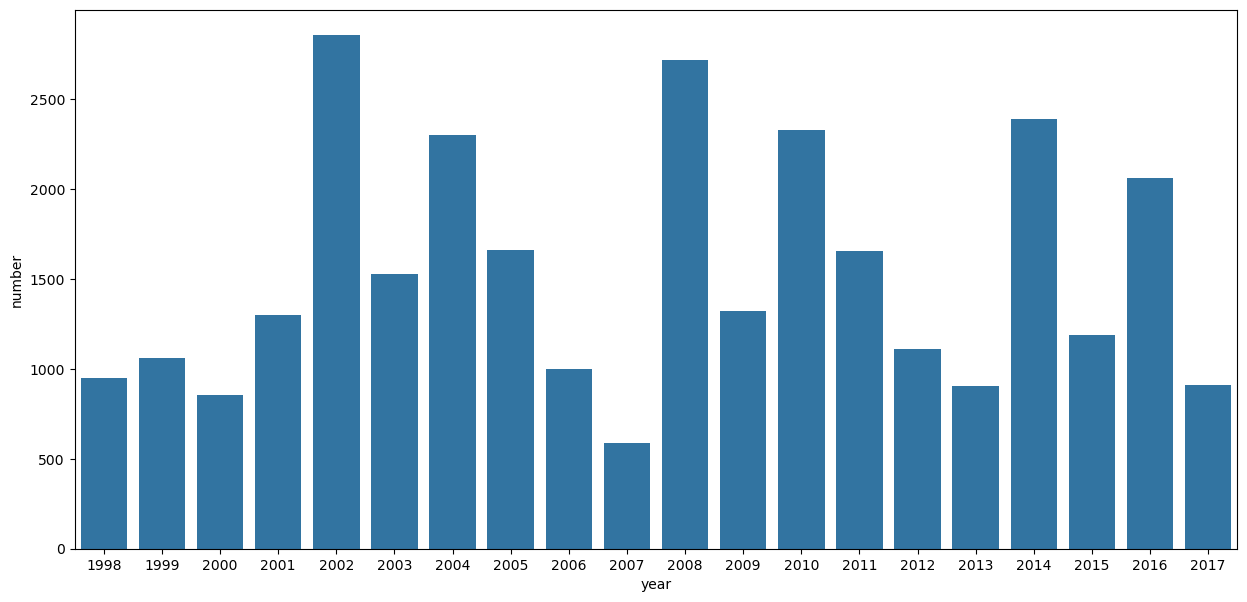

In [79]:
plt.figure(figsize = [15,7])
sns.barplot(x = 'year', y = 'number', data = amazonas_year)

                                we can see that in "2002" maximum number of forest fires are reported in Amazonas state

## Forest fires reported in Amazona (month wise)

In [82]:
amazonas_month = data[data['state'] == 'Amazonas'].groupby('month')['number'].sum().reset_index()
amazonas_month

,month,number
0,April,192.000
1,August,2900.974
2,December,2224.000
3,February,1047.000
4,January,1531.000
5,July,3809.112
6,June,618.000
7,March,728.000
8,May,219.000
9,November,5843.054


<Axes: xlabel='month', ylabel='number'>

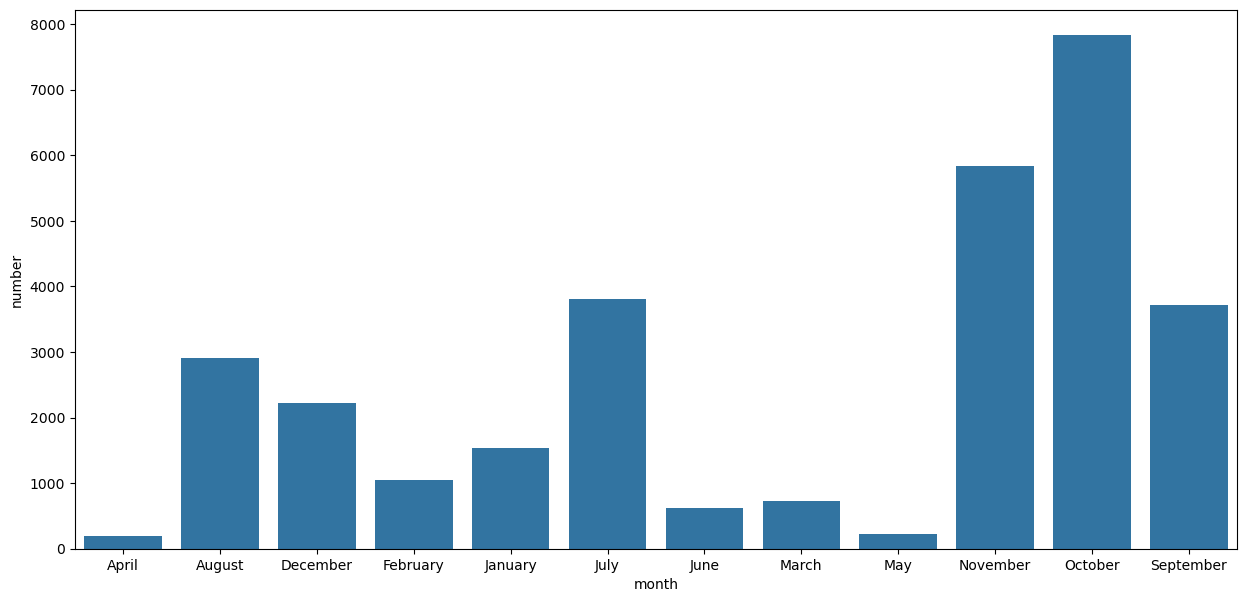

In [83]:
plt.figure(figsize = [15,7])
sns.barplot(x = 'month', y = 'number', data = amazonas_month)

                                we can see that in "October" maximum number of forest fires are reported in Amazonas state

## Forest fires reported in Amazona (Date wise)

In [86]:
amazonas_date = data[data['state'] == 'Amazonas'].groupby('date')['number'].sum().reset_index()
amazonas_date

,date,number
0,1998-01-01,946.000
1,1999-01-01,1061.000
2,2000-01-01,853.000
3,2001-01-01,1297.000
4,2002-01-01,2852.000
5,2003-01-01,1524.268
6,2004-01-01,2298.207
7,2005-01-01,1657.128
8,2006-01-01,997.640
9,2007-01-01,589.601


<Axes: xlabel='number', ylabel='date'>

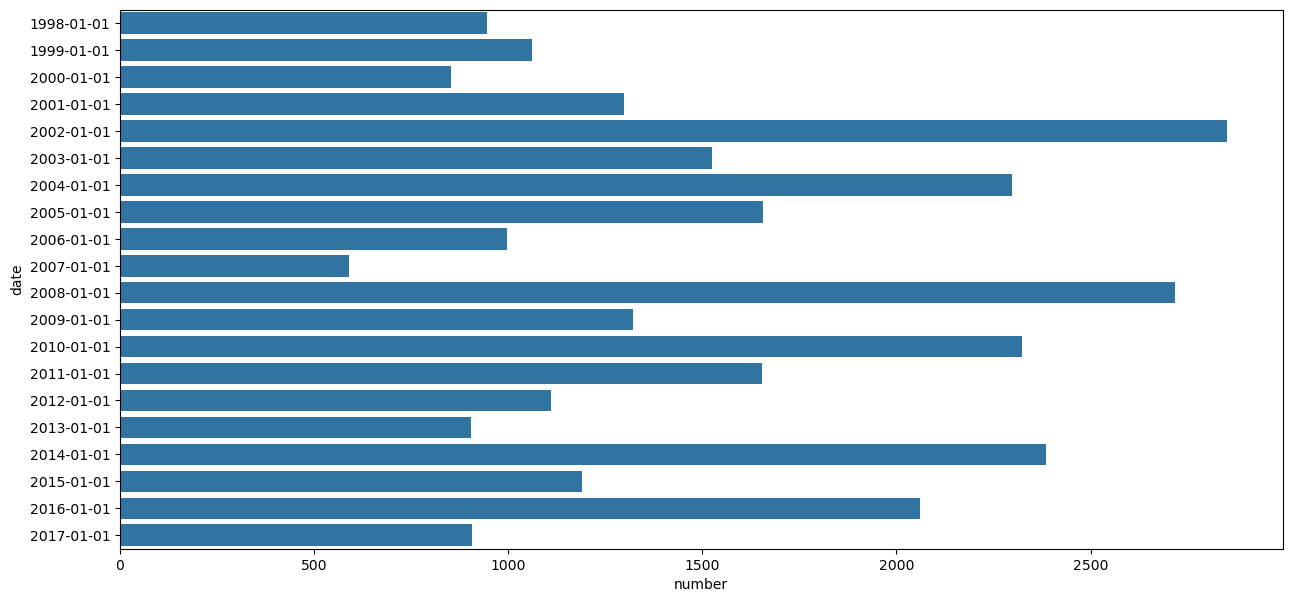

In [87]:
plt.figure(figsize = [15,7])
sns.barplot(y = 'date', x = 'number', data = amazonas_date)

                            we can see that in "01-01-2002" maximum number of forest fires are reported in Amazonas state

## Forest fires reported in Amazona (Day wise)

In [90]:
amazonas_day = data[data['state'] == 'Amazonas'].groupby(data['date'].dt.dayofweek)['number'].sum()
amazonas_day

date
0    1886.601
1    6474.217
2    3910.177
3    5754.802
4    5446.480
5    4162.666
6    3015.186
Name: number, dtype: float64

In [91]:
import calendar

amazonas_day.index = [calendar.day_name[i] for i in range(0,7)]
amazonas_day = amazonas_day.reset_index()
amazonas_day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

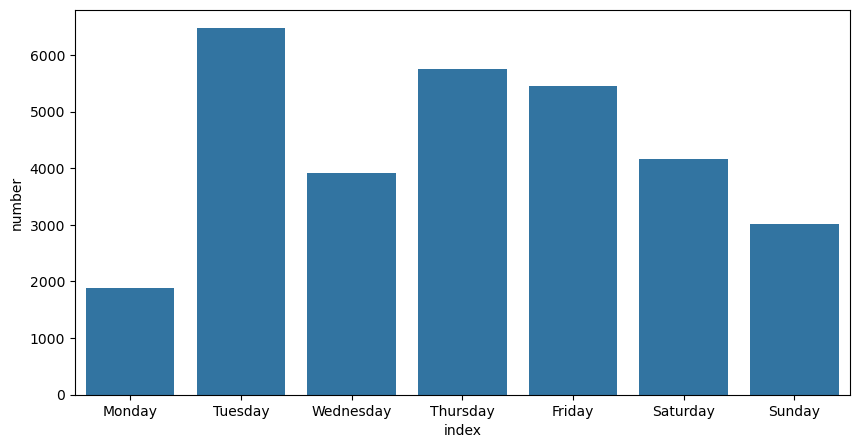

In [92]:
plt.figure(figsize = [10,5])
sns.barplot(y = 'number', x = 'index', data = amazonas_day)

                            we can see that on "TUESDAY" maximum number of forest fires are reported in Amazonas state

## Total number of forest fire reported in 2010 based on each month

In [95]:
amazona_2010 = data[data['year'] == 2010].groupby('month')['number'].sum().reset_index()
amazona_2010

,month,number
0,April,2200.000
1,August,2367.008
2,December,3444.415
3,February,2386.000
4,January,2851.000
5,July,5356.301
6,June,2618.025
7,March,2417.000
8,May,2185.313
9,November,5104.491


<Axes: xlabel='month', ylabel='number'>

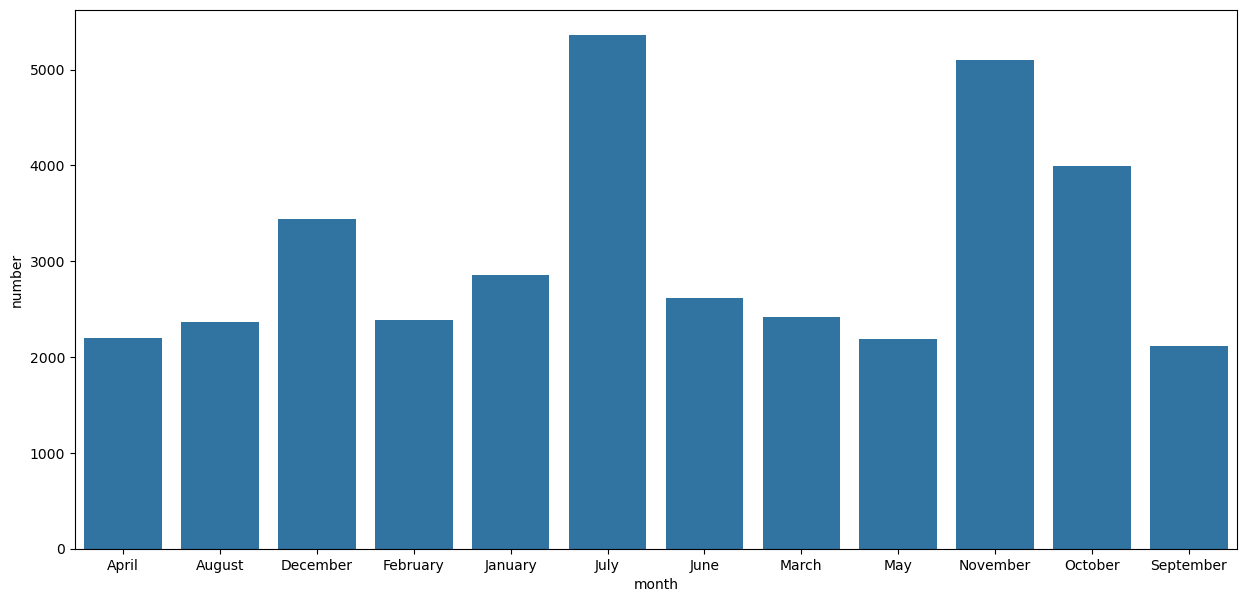

In [96]:
plt.figure(figsize = [15,7])
sns.barplot( x = 'month', y = 'number', data = amazona_2010)

## Find the average number of fires reported from highest to lowest state wise

In [98]:
avg = data.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()
avg

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


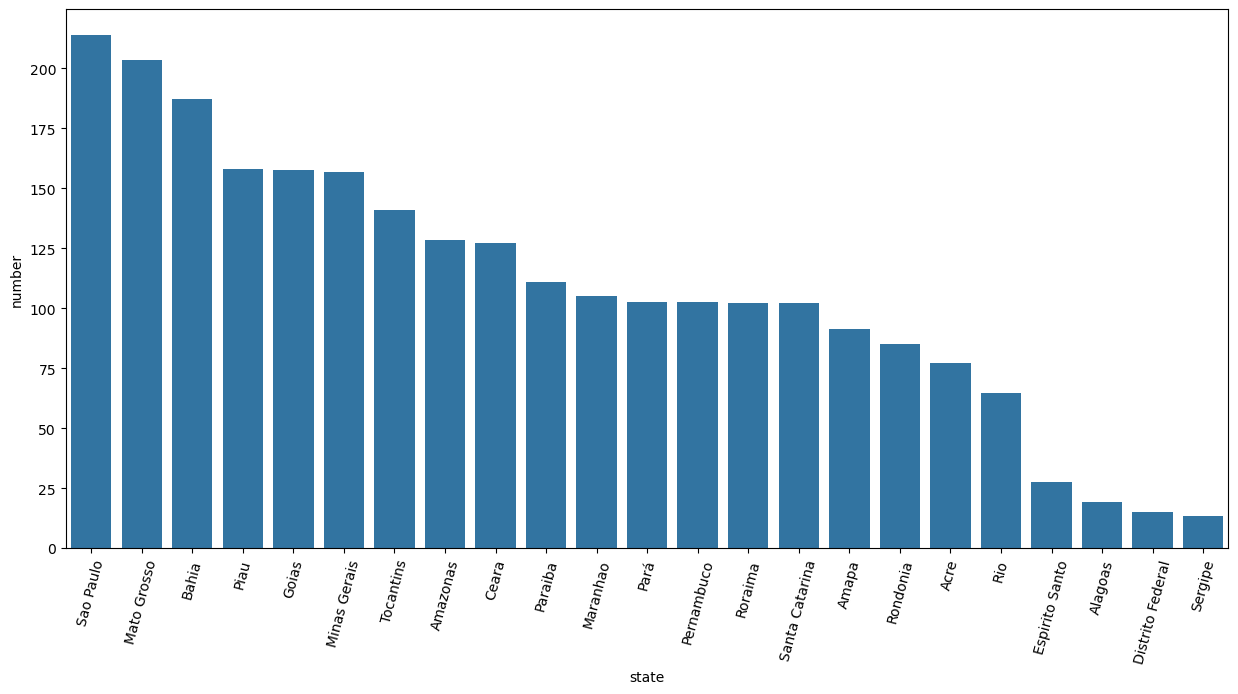

In [99]:
plt.figure(figsize = [15,7])
sns.barplot( x = 'state', y = 'number', data = avg)
plt.xticks(rotation = 75)
plt.show()

## Find the state names where fires reported in December month

In [101]:
dec = data[data['month'] == 'December']['state'].unique()
dec

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

## Worst hit by forest fire state wise

Worst hit :
Mato Grosso
Paraiba
Sao Paulo


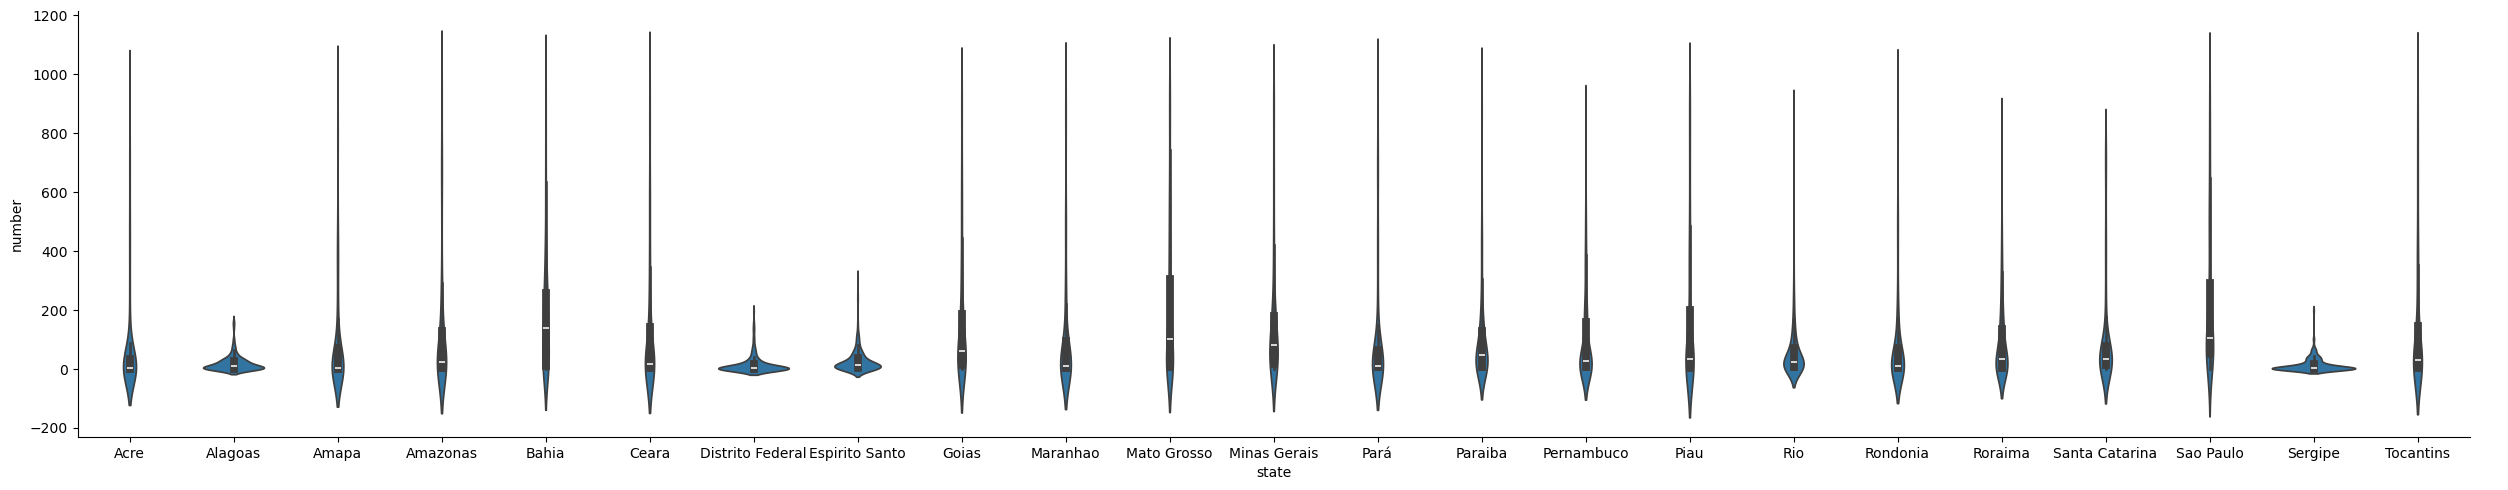

In [109]:
# Group by and sum 'number' only
by_state = data.groupby(["state"], as_index=False).agg({"number": "sum"})

# Plot
sns.catplot(x="state", y="number", data=data[["state", "number"]], kind="violin", aspect=5)

# Find worst hit states
worst_hit = by_state[by_state['number'] > by_state['number'].mean() + by_state['number'].std()]
print("Worst hit :")
for i in range(len(worst_hit)):
    print(worst_hit['state'].values[i])

## Worst hit by forest fire year wise

Worst hit:
2003
2015
2016


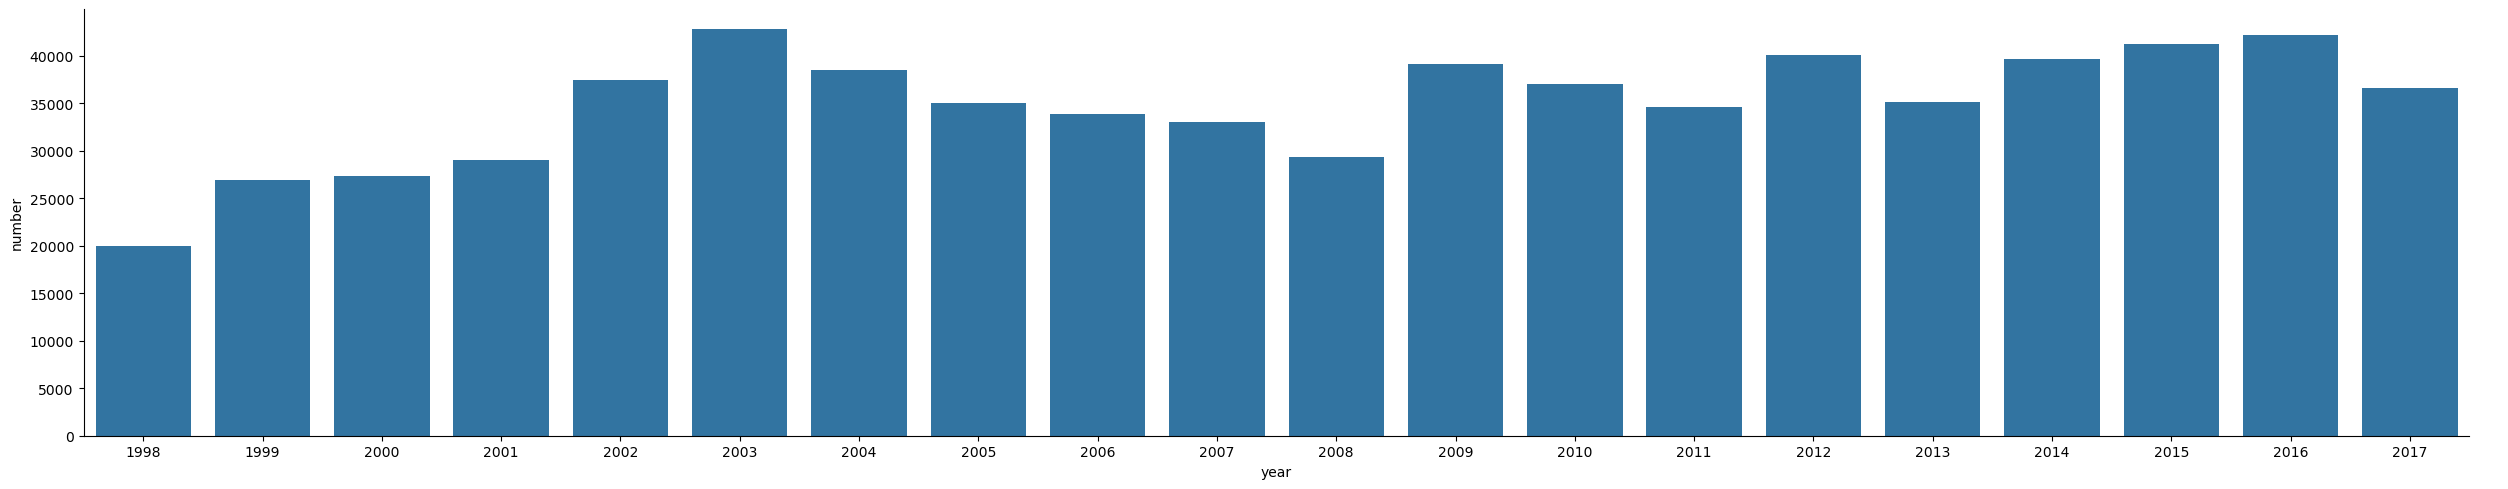

In [111]:
# Group only 'number' column
by_year = data.groupby(["year"], as_index=False).agg({"number": "sum"})

# Plot using grouped data
sns.catplot(x="year", y="number", data=by_year, kind="bar", aspect=5)

# Find worst hit years
worst_hit = by_year[by_year['number'] > by_year['number'].mean() + by_year['number'].std()]
print("Worst hit:")
for year in worst_hit['year']:
    print(year)

## Trend of forest fire from 1998 to 2017

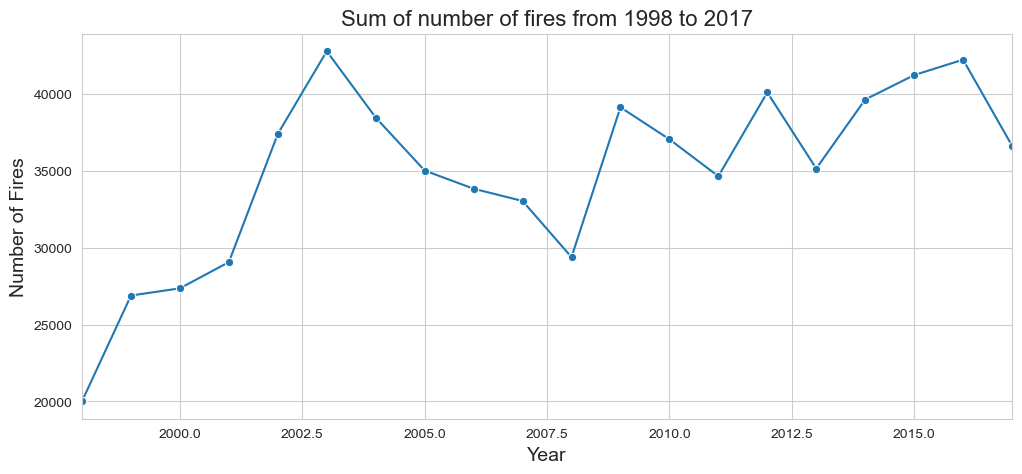

In [123]:
# Correct grouping
by_year = data.groupby(['year'], as_index=False).agg({'number': 'sum'})

# Plot
plt.figure(figsize=[12,5])
plt.xlim([1998, 2017])
plt.title("Sum of number of fires from 1998 to 2017", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
sns.lineplot(x='year', y='number', data=by_year, marker='o')
plt.grid(True)
plt.show()

## Best fit line for this trend line

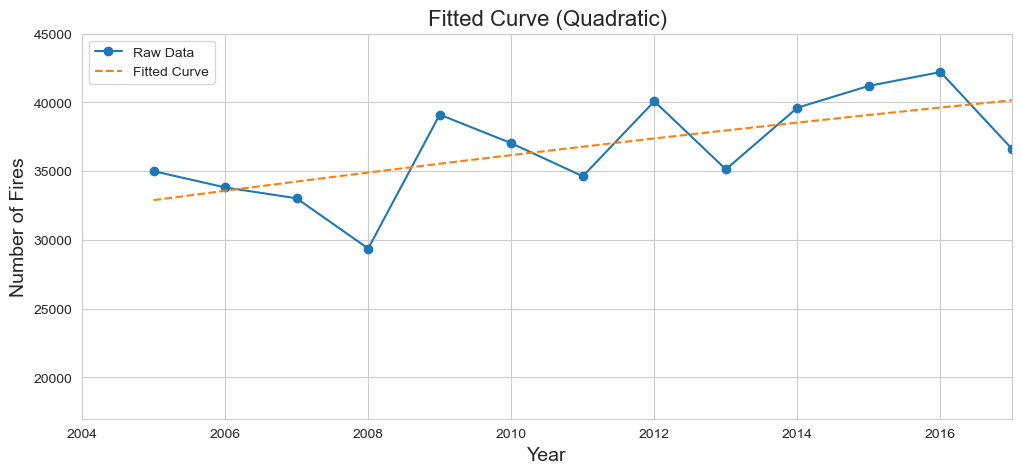

In [125]:
# Filter data
by_year = by_year[by_year['year'] > 2004]

# Fit a 2nd degree polynomial
z = np.poly1d(np.polyfit(by_year['year'], by_year['number'], 2))

# Generate smooth x-axis for fitted line
years_smooth = np.linspace(2005, 2017, 200)  # 200 points for smooth curve

# Plot
plt.figure(figsize=[12,5])
plt.plot(by_year['year'], by_year['number'], "o-", label="Raw Data")  # Real data points
plt.plot(years_smooth, z(years_smooth), "--", label="Fitted Curve")   # Smooth fitted curve
plt.xlim([2004, 2017])
plt.ylim([17000, 45000])
plt.title("Fitted Curve (Quadratic)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Fires", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## Forest fire prediction for next 5 years

In [129]:
for i in range(2018,2023):
    print(i, "-" ,round(z(i)))

2018 - 40671
2019 - 41168
2020 - 41652
2021 - 42120
2022 - 42575
